# Brain-Computer Interfaces (Fall 2017, ELE 594) 
# Instructor: Yalda Shahriari
# 3th homework, 11/1/17 (The homework, is due by Nov 8th, 11:55 pm).

Part 1:

Instructions for part 1:
In this part use the same dataset as you used for the first two homework.

1- Pick two frequencies of 5 Hz and 25 Hz and electrode of Cz.

Then perform complex Morlet wavelet convolution and filter-Hilbert using those two frequencies as the peak/ center frequencies for all trials.

Plot the resulting power and the bandpass-filtered signal (that is, the real component of the analytic signal) from each method (you need to plot the average of all the trials). 

Describe some similarities and differences between the results of the two time-frequency decomposition methods.

Note:
 You need to generate the analytic form of the signal similar to what “hilbert” Matlab
function does.

 Do not use any pre-written Matlab function (e.g., “hilbert’) for generating your results.

In [1]:
import scipy.io as spio
import numpy as np

sampleEEGdata = spio.loadmat(file_name='../data/bci/sampleEEGdata.mat')

In [2]:
sampleEEGdata.keys(), sampleEEGdata['EEG'].shape, sampleEEGdata['EEG'][0, 0].shape # void type

(dict_keys(['__version__', '__globals__', 'EEG', '__header__']), (1, 1), ())

In [3]:
sampleEEGdata['EEG'][0, 0].dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')])

In [4]:
sampleEEGdata['EEG'][0, 0]['data'].shape # data_CxPxT, C: Channels, P: time points, T: Trials

(64, 640, 99)

In [5]:
eeg =  sampleEEGdata['EEG'][0, 0]
data = eeg['data']

In [6]:
eeg.dtype, eeg['nbchan'], eeg['chaninfo']

(dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')]),
 array([[64]], dtype=uint8),
 array([[ ([], [], ['+X'], ['/Users/mcohen1/Documents/MATLAB/eeglab/plugins/dipfit2.2/standard_BESA/standard-10-5-cap385.elp'], [])]], 
       dtype=[('shrink', 'O'), ('plotrad', 'O'), ('nosedir', 'O'), ('filenam

In [7]:
eeg['chanlocs'].dtype, eeg['chanlocs']['labels'].shape

(dtype([('labels', 'O'), ('theta', 'O'), ('radius', 'O'), ('X', 'O'), ('Y', 'O'), ('Z', 'O'), ('sph_theta', 'O'), ('sph_phi', 'O'), ('sph_radius', 'O'), ('type', 'O'), ('urchan', 'O')]),
 (1, 64))

In [8]:
# 1- Pick two frequencies of 5 Hz and 25 Hz and electrode of Cz.
eeg['chanlocs']['labels'].shape

(1, 64)

In [10]:
# 1- Pick two frequencies of 5 Hz and 25 Hz and electrode of Cz.
# How to pick the channel label index indicating the channel number
chanlabels = eeg['chanlocs']['labels']
ch_Cz = np.array(chanlabels == 'Cz')
ch_Cz.argmax(), ch_Cz.argmin()
ch_Cz.shape, ch_Cz[0, 47]

((1, 64), True)

In [11]:
# Complex Morlet Wavelet specification
# r: Sampling rate of EEG
# M: number of points in a channel should be equal to the EEG signal length
# s: constant number of cycles -2*pi*s to +2*pi*s
# f: Wavelet freq for activity  pattern recognition
# w: The number of cycles/ period of the phase/real part
r, s, w, M, f1, f2 = eeg['srate'][0, 0], 1.0, 3.0, data.shape[1], 5, 25
r, s, w, M, f1, f2, data.shape

(256, 1.0, 3.0, 640, 5, 25, (64, 640, 99))

freq: 5 cycles: 3.0 scale: 2.08333333333 M: 640 sampling rate: 256
freq: 25 cycles: 3.0 scale: 10.4166666667 M: 640 sampling rate: 256


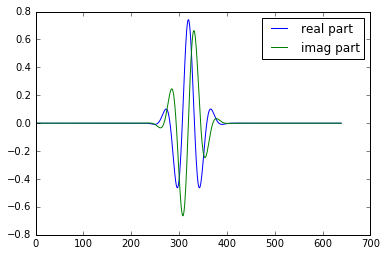

In [20]:
# 1- Pick two frequencies of 5 Hz and 25 Hz and electrode of Cz.
# Then perform complex Morlet wavelet convolution and 
# filter-Hilbert using those two frequencies 
# as the peak/ center frequencies for all trials.
# Plot the resulting power and the bandpass-filtered signal 
# (that is, the real component of the analytic signal) from each method 
# (you need to plot the average of all the trials).


import scipy.signal as sp_signal
import matplotlib.pyplot as mplot


def normalize(X):
    return (X - X.mean(axis=0))/ X.std(axis=0)

# Wavelet frequencies from 2 Hz to 30 Hz: 7 choices, 28 = 7 * 4
# Number of cycles from 3 cycles to 10 cycles: 7 choices
# for w in range(3, 11, 1): # including 3 and 10
# f = (2*s*r*w)/ M
# # for f in range(2, 42, 2): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
# for step in range(0, 20, 1): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
#     # f: 2 to 40, 38/19, step 2
#     # W: 3 to 10,  7/19=0.35 step
# #     w = 3 + ((7/19) * step) 
# w = 3 # number of cycles, discrete number
# f = 2.0 + ((38/19) * step)

s1 = (f1*M) / (2*w*r)
print('freq:', f1, 'cycles:', w, 'scale:', s1, 'M:', M, 'sampling rate:', r)

wavelet = sp_signal.morlet(M=M, w=w, s=s1, complete=True)

s2 = (f2*M) / (2*w*r)
print('freq:', f2, 'cycles:', w, 'scale:', s2, 'M:', M, 'sampling rate:', r)

wavelet2 = sp_signal.morlet(M=M, w=w, s=s2, complete=True)


# Now calculate Amplitude & Phase
A = ((wavelet.real**2) + (wavelet.imag**2))**0.5
A_norm = normalize(X=A)
P = np.arctan(wavelet.imag/wavelet.real) # imag=y, real=x
P_norm = normalize(X=P)
wavelet_real_norm = normalize(X=wavelet.real)
wavelet_imag_norm = normalize(X=wavelet.imag)

# plotting
# mplot.plot(wavelet, label='wavelet')
mplot.plot(wavelet.real, label='real part')
mplot.plot(wavelet.imag, label='imag part')
# mplot.plot(wavelet_real_norm, label='real part norm')
# mplot.plot(wavelet_imag_norm, label='imag part norm')
# mplot.plot(A, label='Amplitude part')
# mplot.plot(A_norm, label='Amplitude part norm')
# mplot.plot(P, label='Phase part')
# mplot.plot(P_norm, label='Phase part norm')
mplot.legend()
mplot.show()

freq: 25 cycles: 3.0 scale: 10.4166666667 M: 640 sampling rate: 256


/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


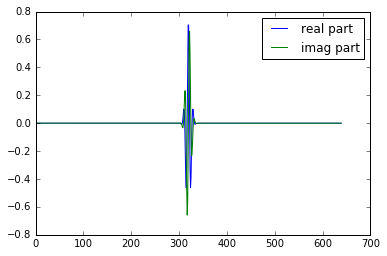

In [21]:
s2 = (f2*M) / (2*w*r)
print('freq:', f2, 'cycles:', w, 'scale:', s2, 'M:', M, 'sampling rate:', r)

wavelet = sp_signal.morlet(M=M, w=w, s=s2, complete=True)


# Now calculate Amplitude & Phase
A = ((wavelet.real**2) + (wavelet.imag**2))**0.5
A_norm = normalize(X=A)
P = np.arctan(wavelet.imag/wavelet.real) # imag=y, real=x
P_norm = normalize(X=P)
wavelet_real_norm = normalize(X=wavelet.real)
wavelet_imag_norm = normalize(X=wavelet.imag)

# plotting
# mplot.plot(wavelet, label='wavelet')
mplot.plot(wavelet.real, label='real part')
mplot.plot(wavelet.imag, label='imag part')
# mplot.plot(wavelet_real_norm, label='real part norm')
# mplot.plot(wavelet_imag_norm, label='imag part norm')
# mplot.plot(A, label='Amplitude part')
# mplot.plot(A_norm, label='Amplitude part norm')
# mplot.plot(P, label='Phase part')
# mplot.plot(P_norm, label='Phase part norm')
mplot.legend()
mplot.show()